In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("emp.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Bagging

In [3]:
df.dropna(inplace=True)

In [4]:
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole','MaritalStatus','Over18','OverTime'] 
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df[categorical_cols] =df[categorical_cols].apply(lambda col: le.fit_transform(col))
categorical_cols=pd.DataFrame(df[categorical_cols])
categorical_cols

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,2,2,1,0,7,2,0,1
1,1,1,1,1,6,1,0,0
2,2,1,4,1,2,2,0,1
3,1,1,1,0,6,1,0,1
4,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...
1465,1,1,3,1,2,1,0,0
1466,2,1,3,1,0,1,0,0
1467,2,1,1,1,4,1,0,1
1468,1,2,3,1,7,1,0,0


In [5]:
df=df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole','MaritalStatus','Over18','OverTime'],axis=1)
df_model=pd.concat([df,categorical_cols],axis=1)
df_model


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,Yes,1102,1,2,1,1,2,94,3,...,0,5,2,2,1,0,7,2,0,1
1,49,No,279,8,1,1,2,3,61,2,...,1,7,1,1,1,1,6,1,0,0
2,37,Yes,1373,2,2,1,4,4,92,2,...,0,0,2,1,4,1,2,2,0,1
3,33,No,1392,3,4,1,5,4,56,3,...,3,0,1,1,1,0,6,1,0,1
4,27,No,591,2,1,1,7,1,40,3,...,2,2,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,1,2061,3,41,4,...,0,3,1,1,3,1,2,1,0,0
1466,39,No,613,6,1,1,2062,4,42,2,...,1,7,2,1,3,1,0,1,0,0
1467,27,No,155,4,3,1,2064,2,87,4,...,0,3,2,1,1,1,4,1,0,1
1468,49,No,1023,2,3,1,2065,4,63,2,...,0,8,1,2,3,1,7,1,0,0


In [6]:
X = df.drop(['EmployeeNumber','Attrition'], axis=1)
X_col = X.columns
y = df['Attrition']
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X.values)

In [7]:
y.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))

**Decision Trees**

In [10]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       870
         Yes       1.00      1.00      1.00       159

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029


Confusion Matrix: 
 [[870   0]
 [  0 159]]

ROC AUC: 1.0000

Average Accuracy: 	 0.7639
Accuracy SD: 		 0.0313
Test Result:

accuracy score: 0.7370

Classification Report: 
               precision    recall  f1-score   support

          No       0.84      0.83      0.84       363
         Yes       0.27      0.28      0.28        78

    accuracy                           0.74       441
   macro avg       0.56      0.56      0.56       441
weighted avg       0.74      0.74      0.74       441


Confusion Matrix: 
 [[303  60]
 [ 56  22]]

ROC AUC: 0.5584



In [12]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=1000, n_jobs=-1, oob_score=True,
                  random_state=42)

In [13]:
bag_clf.oob_score_

0.8464528668610302

In [14]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       870
         Yes       1.00      1.00      1.00       159

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029


Confusion Matrix: 
 [[870   0]
 [  0 159]]

ROC AUC: 1.0000

Average Accuracy: 	 0.7639
Accuracy SD: 		 0.0313
Test Result:

accuracy score: 0.7370

Classification Report: 
               precision    recall  f1-score   support

          No       0.84      0.83      0.84       363
         Yes       0.27      0.28      0.28        78

    accuracy                           0.74       441
   macro avg       0.56      0.56      0.56       441
weighted avg       0.74      0.74      0.74       441


Confusion Matrix: 
 [[303  60]
 [ 56  22]]

ROC AUC: 0.5584



## AdaBoost

In [15]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=1)

In [16]:
# Y_pred = adaboost.predict(X_test)
print_score(adaboost, X_train, X_test, y_train, y_test, train=True)
print_score(adaboost, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8999

Classification Report: 
               precision    recall  f1-score   support

          No       0.91      0.98      0.94       870
         Yes       0.81      0.46      0.59       159

    accuracy                           0.90      1029
   macro avg       0.86      0.72      0.76      1029
weighted avg       0.89      0.90      0.89      1029


Confusion Matrix: 
 [[853  17]
 [ 86  73]]

ROC AUC: 0.7198

Average Accuracy: 	 0.8435
Accuracy SD: 		 0.0160
Test Result:

accuracy score: 0.8118

Classification Report: 
               precision    recall  f1-score   support

          No       0.84      0.95      0.89       363
         Yes       0.42      0.18      0.25        78

    accuracy                           0.81       441
   macro avg       0.63      0.56      0.57       441
weighted avg       0.77      0.81      0.78       441


Confusion Matrix: 
 [[344  19]
 [ 64  14]]

ROC AUC: 0.5636



## Adaboost + Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
random_forest = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [18]:
adaboost_random = AdaBoostClassifier(n_estimators=100, base_estimator=random_forest,learning_rate=1, random_state = 1)
adaboost_random.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=0),
                   learning_rate=1, n_estimators=100, random_state=1)

In [19]:
print_score(adaboost_random, X_train, X_test, y_train, y_test, train=True)
print_score(adaboost_random, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       870
         Yes       1.00      1.00      1.00       159

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029


Confusion Matrix: 
 [[870   0]
 [  0 159]]

ROC AUC: 1.0000

Average Accuracy: 	 0.8504
Accuracy SD: 		 0.0106
Test Result:

accuracy score: 0.8367

Classification Report: 
               precision    recall  f1-score   support

          No       0.84      0.99      0.91       363
         Yes       0.80      0.10      0.18        78

    accuracy                           0.84       441
   macro avg       0.82      0.55      0.55       441
weighted avg       0.83      0.84      0.78       441


Confusion Matrix: 
 [[361   2]
 [ 70   8]]

ROC AUC: 0.5485



## Gradient Boosting

In [20]:
gradient_boost= GradientBoostingClassifier(n_estimators=100)
gradient_boost.fit(X_train, y_train)

GradientBoostingClassifier()

In [21]:
print_score(gradient_boost, X_train, X_test, y_train, y_test, train=True)
print_score(gradient_boost, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9397

Classification Report: 
               precision    recall  f1-score   support

          No       0.93      1.00      0.97       870
         Yes       1.00      0.61      0.76       159

    accuracy                           0.94      1029
   macro avg       0.97      0.81      0.86      1029
weighted avg       0.94      0.94      0.93      1029


Confusion Matrix: 
 [[870   0]
 [ 62  97]]

ROC AUC: 0.8050

Average Accuracy: 	 0.8367
Accuracy SD: 		 0.0197
Test Result:

accuracy score: 0.8345

Classification Report: 
               precision    recall  f1-score   support

          No       0.85      0.97      0.91       363
         Yes       0.60      0.19      0.29        78

    accuracy                           0.83       441
   macro avg       0.72      0.58      0.60       441
weighted avg       0.80      0.83      0.80       441


Confusion Matrix: 
 [[353  10]
 [ 63  15]]

ROC AUC: 0.5824



## XG Boost 

In [22]:
!pip3 install xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [23]:
from xgboost import XGBClassifier

In [24]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
print_score(model, X_train, X_test, y_train, y_test, train=True)
print_score(model, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       870
         Yes       1.00      1.00      1.00       159

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029


Confusion Matrix: 
 [[870   0]
 [  0 159]]

ROC AUC: 1.0000

Average Accuracy: 	 0.8338
Accuracy SD: 		 0.0151
Test Result:

accuracy score: 0.8367

Classification Report: 
               precision    recall  f1-score   support

          No       0.85      0.97      0.91       363
         Yes       0.62      0.21      0.31        78

    accuracy                           0.84       441
   macro avg       0.73      0.59      0.61       441
weighted avg       0.81      0.84      0.80       441


Confusion Matrix: 
 [[353  10]
 [ 62  16]]

ROC AUC: 0.5888



# Stacking

## Meta Classifier 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold

In [27]:
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

In [28]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

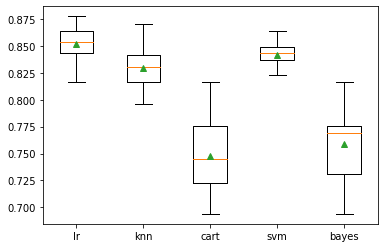

In [29]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## Single Classifier 

### Random forest --> Adaboost --> Bagging


In [35]:
random_forest = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
adaboost_random = AdaBoostClassifier(n_estimators=100, base_estimator=random_forest,learning_rate=1, random_state = 1)
adaboost_random.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=0),
                   learning_rate=1, n_estimators=100, random_state=1)

In [32]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 

In [34]:
seed = 8
# no. of base classifier 
num_trees = 500
kfold = model_selection.KFold(n_splits = 3, 
                       random_state = seed) 
  
# bagging classifier 
model = BaggingClassifier(base_estimator = adaboost_random, 
                          n_estimators = num_trees, 
                          random_state = seed) 
  
results = model_selection.cross_val_score(model, X, y, cv = kfold) 
print("accuracy :") 
print(results.mean()) 

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


accuracy :
0.8476190476190476


In [39]:
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=0),
                                                    learning_rate=1,
                                                    n_estimators=100,
                                                    random_state=1),
                  n_estimators=500, random_state=8)

In [40]:
print_score(model, X_train, X_test, y_train, y_test, train=True)


Train Result:

accuracy score: 0.9514

Classification Report: 
               precision    recall  f1-score   support

          No       0.95      1.00      0.97       870
         Yes       1.00      0.69      0.81       159

    accuracy                           0.95      1029
   macro avg       0.97      0.84      0.89      1029
weighted avg       0.95      0.95      0.95      1029


Confusion Matrix: 
 [[870   0]
 [ 50 109]]

ROC AUC: 0.8428



KeyboardInterrupt: 

print_score(model, X_train, X_test, y_train, y_test, train=False)

In [41]:
print_score(model, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.8367

Classification Report: 
               precision    recall  f1-score   support

          No       0.84      1.00      0.91       363
         Yes       0.88      0.09      0.16        78

    accuracy                           0.84       441
   macro avg       0.86      0.54      0.54       441
weighted avg       0.84      0.84      0.78       441


Confusion Matrix: 
 [[362   1]
 [ 71   7]]

ROC AUC: 0.5435

